# Modèle de classification Ethiquette DPE

## Chargement du modele

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [218]:
data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_EnergetiqueA\\Performance_Energetique\\Data\\data69rhone.csv")
print(data.shape)
data.head()

C:\Users\karam\AppData\Local\Temp\ipykernel_18548\3346092287.py:1: DtypeWarning: Columns (3,27,39,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_EnergetiqueA\\Performance_Energetique\\Data\\data69rhone.csv")


(287165, 127)


,Conso_chauffage_dépensier_é_finale,Nom__commune_(BAN),Emission_GES_chauffage,Besoin_refroidissement,Coût_total_5_usages,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Type_installation_ECS_(général),Déperditions_murs,Conso_5_usages_par_m²_é_primaire,...,Coût_chauffage_énergie_n°2,N°_DPE_immeuble_associé,Catégorie_ENR,Logement,Annee_reception_DPE,Somme_coûts,Vérification_coût_total,Coût chauffage en %,passoire_energetique,Periode_construction
0,5849.5,Lyon,380.0,0,1360.0,842365.11,1.0,individuel,57.3,535.0,...,NaN,NaN,NaN,ancien,2024,1360.0,True,76.470588,True,Avant 1960
1,10243.9,Lyon,669.0,0,2195.5,842432.78,1.0,individuel,85.1,583.0,...,NaN,NaN,NaN,ancien,2024,2195.5,False,80.441813,True,NaN
2,15941.8,Lyon,2996.1,0,1684.8,842540.42,1.0,individuel,82.3,386.0,...,0.0,NaN,NaN,ancien,2024,1684.8,False,83.891263,True,NaN
3,10499.9,Lyon,1936.4,0,1369.4,842600.66,1.0,individuel,24.9,156.0,...,0.0,NaN,NaN,ancien,2024,1369.3,False,69.818899,False,NaN
4,956.1,Lyon,58.7,0,544.6,842544.94,1.0,individuel,3.6,152.0,...,NaN,NaN,NaN,ancien,2024,544.6,True,36.412046,False,NaN


In [219]:
data['Periode_construction']

0         Avant 1960
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
287160    Après 2010
287161    Après 2010
287162    Après 2010
287163    Après 2010
287164    Après 2010
Name: Periode_construction, Length: 287165, dtype: object

In [220]:
# Vérification des valeurs manquantes par colonne
missing_data = data.isnull().sum().sort_values(ascending=False)
print("Valeurs manquantes:\n", missing_data[missing_data > 0])

Valeurs manquantes:
 Catégorie_ENR                         222081
N°_DPE_immeuble_associé               206930
Appartement_non_visité_(0/1)          180027
Nombre_niveau_immeuble                167795
Inertie_lourde_(0/1)                  136876
                                       ...  
Conso_chauffage_dépensier_é_finale         6
Emission_GES_chauffage                     6
Conso_chauffage_é_primaire                 6
Ubat_W/m²_K                                1
Conso_auxiliaires_é_finale                 1
Length: 80, dtype: int64


In [221]:
print(data["Etiquette_DPE"].isnull().sum())

0


In [222]:
data['Etiquette_DPE']

0         G
1         G
2         F
3         D
4         C
         ..
287160    A
287161    A
287162    A
287163    A
287164    A
Name: Etiquette_DPE, Length: 287165, dtype: object

In [223]:
# Imputation pour les colonnes avec peu de valeurs manquantes
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
    
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [224]:
for  i in  data.columns: 
    print(i)

Conso_chauffage_dépensier_é_finale
Nom__commune_(BAN)
Emission_GES_chauffage
Besoin_refroidissement
Coût_total_5_usages
Coordonnée_cartographique_X_(BAN)
Nombre_niveau_logement
Type_installation_ECS_(général)
Déperditions_murs
Conso_5_usages_par_m²_é_primaire
Coût_refroidissement
Ubat_W/m²_K
Coût_ECS_dépensier
Emission_GES_auxiliaires
Année_construction
Emission_GES_5_usages_par_m²
Emission_GES_éclairage
Conso_ECS_dépensier_é_finale
Adresse_(BAN)
Date_visite_diagnostiqueur
Coût_ECS
Nombre_niveau_immeuble
Surface_habitable_immeuble
Complément_d'adresse_logement
Coût_éclairage
Date_établissement_DPE
N°_voie_(BAN)
Besoin_ECS
N°DPE
Conso_refroidissement_é_finale
Logement_traversant_(0/1)
Conso_chauffage_é_primaire
Appartement_non_visité_(0/1)
Adresse_brute
Conso_éclairage_é_primaire
Qualité_isolation_menuiseries
Qualité_isolation_murs
Emission_GES_5_usages_énergie_n°1
Statut_géocodage
Classe_inertie_bâtiment
Nombre_appartement
Modèle_DPE
Conso_5_usages_é_finale
N°_département_(BAN)
Conso_r

c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


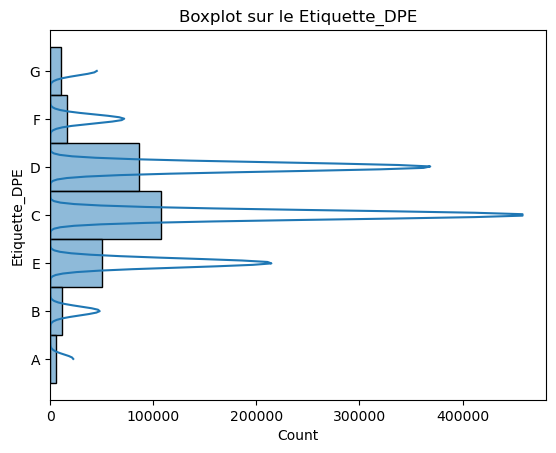

In [225]:
target = "Etiquette_DPE"
# Créer un boxplot pour une colonne spécifique
sns.histplot(data=data, y = target,  bins=10,  kde=True)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

In [226]:
#le type de la colone Etiquette_DPE
data['Etiquette_DPE'].dtype

dtype('O')

In [227]:
data['Besoin_ECS']

0            848,1
1           1022,5
2             1006
3           1295,3
4            894,3
            ...   
287160    358405,8
287161    358405,8
287162    358405,8
287163    358405,8
287164    358405,8
Name: Besoin_ECS, Length: 287165, dtype: object

In [228]:
# Correction des champs non homogènes avec une virgule comme séparateur
# Ici, on remplace les virgules par des points, puis on convertit en float

data['Besoin_ECS'] = pd.to_numeric(data['Besoin_ECS'].replace(',', '.', regex=True), errors='coerce')

# Vérification des types après conversion
print(data['Besoin_ECS'].dtype)


float64


In [229]:
data['Besoin_ECS']

0            848.1
1           1022.5
2           1006.0
3           1295.3
4            894.3
            ...   
287160    358405.8
287161    358405.8
287162    358405.8
287163    358405.8
287164    358405.8
Name: Besoin_ECS, Length: 287165, dtype: float64

In [230]:
ls_variables_explicatives = [
    'Année_construction',
    'Besoin_ECS',
    'Besoin_chauffage',
    'Coût_chauffage',
    'Coût_total_5_usages',
    'Conso_5_usages/m²_é_finale',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_finale',
    'Conso_ECS_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'Conso_chauffage_é_finale',
    'Conso_chauffage_é_primaire',
    'Conso_éclairage_é_finale',
    'Conso_refroidissement_é_finale',
    'Deperditions_baies_vitrées',
    'Déperditions_murs',
    'Deperditions_planchers_bas',
    'Deperditions_planchers_hauts',
    'Déperditions_ponts_thermiques',
    'Déperditions_renouvellement_air',
    'Deperditions_enveloppe',
    'Emission_GES_5_usages_par_m²',
    'Emission_GES_chauffage',
    'Emission_GES_refroidissement',
    'Inertie_lourde_(0/1)',
    'Nombre_appartement',
    'Nombre_niveau_logement',
    'Periode_construction',
    'Surface_habitable_immeuble',
    'Surface_habitable_logement',
    'Type_bâtiment',
    'Type_énergie_principale_chauffage',
    'Type_installation_chauffage',
    'Zone_climatique_',
    'Qualité_isolation_murs',
    'Qualité_isolation_plancher_bas'
]

In [231]:
print(data[ls_variables_explicatives].dtypes)

Année_construction                     float64
Besoin_ECS                             float64
Besoin_chauffage                       float64
Coût_chauffage                         float64
Coût_total_5_usages                    float64
Conso_5_usages/m²_é_finale             float64
Conso_5_usages_par_m²_é_primaire       float64
Conso_5_usages_é_finale_énergie_n°1    float64
Conso_auxiliaires_é_finale             float64
Conso_ECS_é_primaire                   float64
Conso_ECS_dépensier_é_finale           float64
Conso_chauffage_é_finale               float64
Conso_chauffage_é_primaire             float64
Conso_éclairage_é_finale               float64
Conso_refroidissement_é_finale         float64
Deperditions_baies_vitrées             float64
Déperditions_murs                      float64
Deperditions_planchers_bas             float64
Deperditions_planchers_hauts           float64
Déperditions_ponts_thermiques          float64
Déperditions_renouvellement_air        float64
Deperditions_

In [232]:
# Vérification des données manquantes
data[ls_variables_explicatives].isnull().mean().sort_values(ascending=False)

Année_construction                     0.0
Déperditions_ponts_thermiques          0.0
Deperditions_enveloppe                 0.0
Emission_GES_5_usages_par_m²           0.0
Emission_GES_chauffage                 0.0
Emission_GES_refroidissement           0.0
Inertie_lourde_(0/1)                   0.0
Nombre_appartement                     0.0
Nombre_niveau_logement                 0.0
Periode_construction                   0.0
Surface_habitable_immeuble             0.0
Surface_habitable_logement             0.0
Type_bâtiment                          0.0
Type_énergie_principale_chauffage      0.0
Type_installation_chauffage            0.0
Zone_climatique_                       0.0
Qualité_isolation_murs                 0.0
Déperditions_renouvellement_air        0.0
Deperditions_planchers_hauts           0.0
Besoin_ECS                             0.0
Deperditions_planchers_bas             0.0
Besoin_chauffage                       0.0
Coût_chauffage                         0.0
Coût_total_

In [233]:
# Sélectionner toutes les colonnes non numériques (qualitatives)
categorical_cols = data[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns

categorical_cols

Index(['Inertie_lourde_(0/1)', 'Periode_construction', 'Type_bâtiment',
       'Type_énergie_principale_chauffage', 'Type_installation_chauffage',
       'Zone_climatique_', 'Qualité_isolation_murs',
       'Qualité_isolation_plancher_bas'],
      dtype='object')

In [234]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder  =  OrdinalEncoder()
# encoding categorical data

data[categorical_cols] = ordinalEncoder.fit_transform(data[categorical_cols])

In [235]:
# Sélectionner uniquement les colonnes quantitatives (numériques)
quant_cols = data[ls_variables_explicatives].select_dtypes(include=[np.number]).columns

# Afficher les colonnes quantitatives
print("Colonnes quantitatives :", quant_cols)

Colonnes quantitatives : Index(['Année_construction', 'Besoin_ECS', 'Besoin_chauffage',
       'Coût_chauffage', 'Coût_total_5_usages', 'Conso_5_usages/m²_é_finale',
       'Conso_5_usages_par_m²_é_primaire',
       'Conso_5_usages_é_finale_énergie_n°1', 'Conso_auxiliaires_é_finale',
       'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_finale',
       'Conso_chauffage_é_finale', 'Conso_chauffage_é_primaire',
       'Conso_éclairage_é_finale', 'Conso_refroidissement_é_finale',
       'Deperditions_baies_vitrées', 'Déperditions_murs',
       'Deperditions_planchers_bas', 'Deperditions_planchers_hauts',
       'Déperditions_ponts_thermiques', 'Déperditions_renouvellement_air',
       'Deperditions_enveloppe', 'Emission_GES_5_usages_par_m²',
       'Emission_GES_chauffage', 'Emission_GES_refroidissement',
       'Inertie_lourde_(0/1)', 'Nombre_appartement', 'Nombre_niveau_logement',
       'Periode_construction', 'Surface_habitable_immeuble',
       'Surface_habitable_logement', 'Type_bât

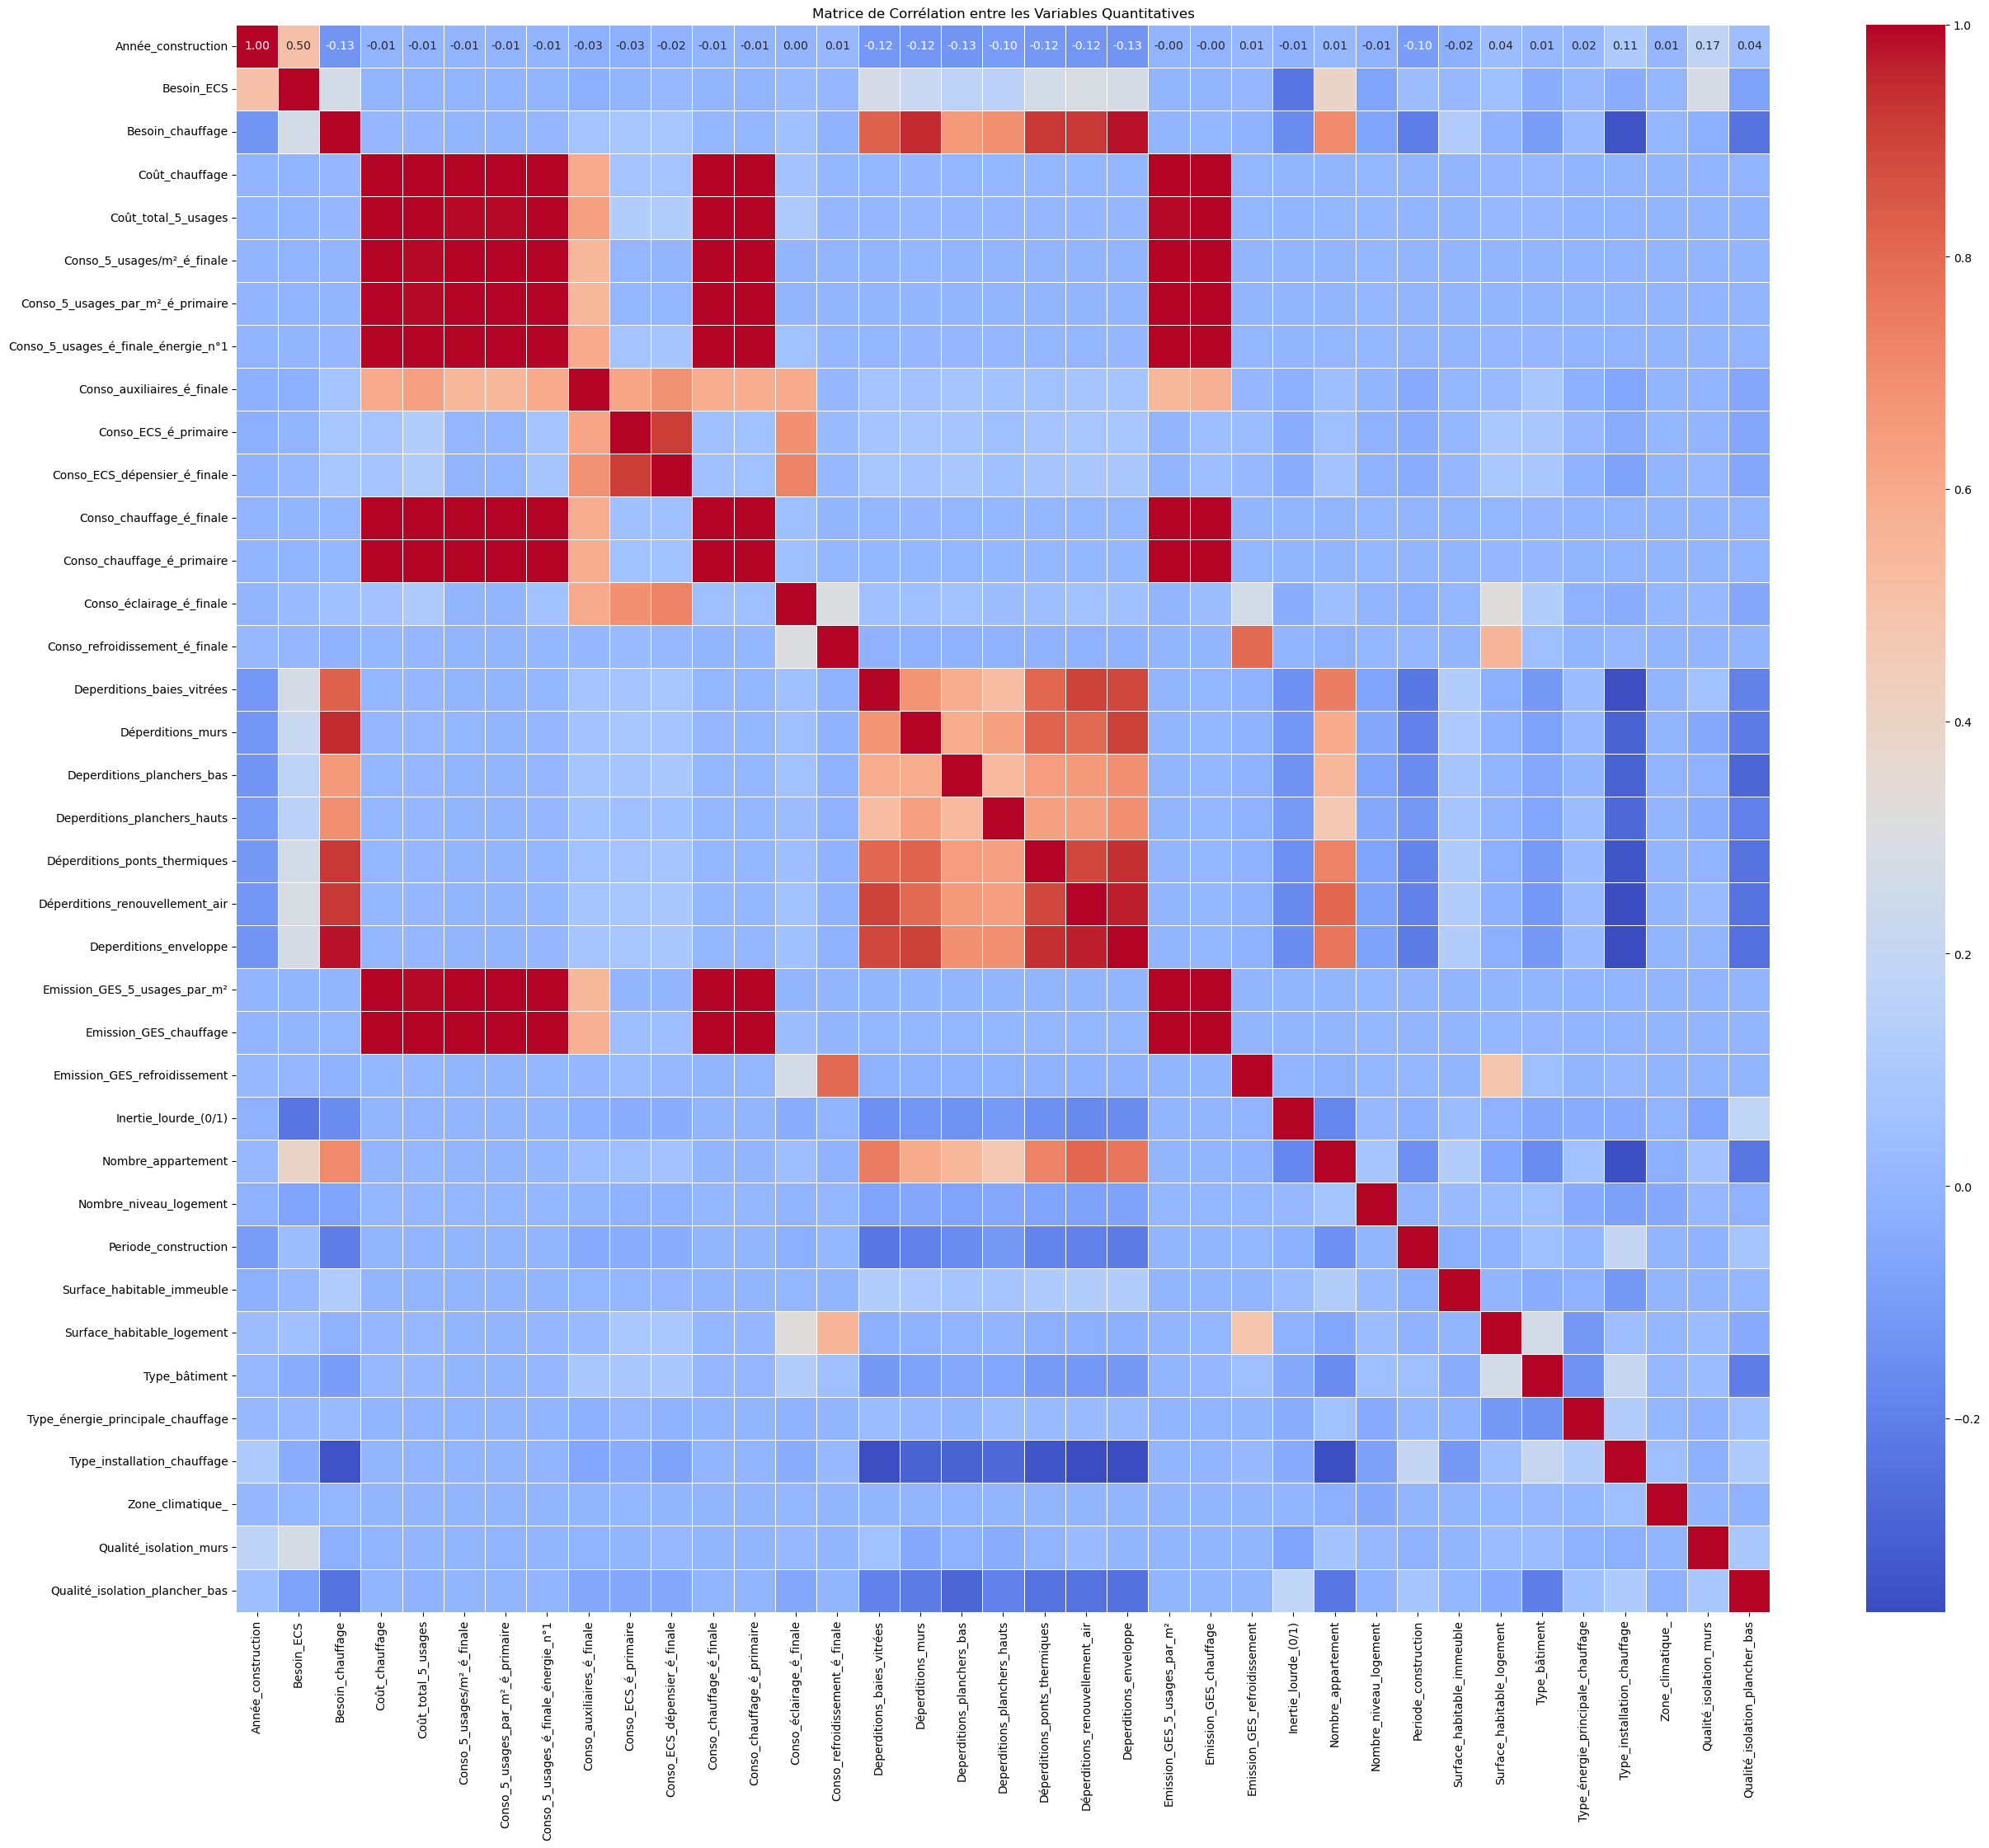

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les variables quantitatives
correlation_matrix = data[quant_cols].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(30, 25)) # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation entre les Variables Quantitatives')
plt.show()


In [237]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Remplacer les valeurs manquantes dans les colonnes catégorielles par une chaîne, par exemple "inconnu"
data[categorical_cols] = data[categorical_cols].fillna("inconnu")

# 2. Vérifier que les colonnes catégorielles contiennent bien des chaînes de caractères uniquement
for col in categorical_cols:
    data[col] = data[col].astype(str) 

# 3. Appliquer l'encoder ordinal
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
data[categorical_cols] = ordinalEncoder.fit_transform(data[categorical_cols])


In [238]:
data[categorical_cols].dtypes

Inertie_lourde_(0/1)                 float64
Periode_construction                 float64
Type_bâtiment                        float64
Type_énergie_principale_chauffage    float64
Type_installation_chauffage          float64
Zone_climatique_                     float64
Qualité_isolation_murs               float64
Qualité_isolation_plancher_bas       float64
dtype: object

In [239]:
data['Etiquette_DPE']

0         G
1         G
2         F
3         D
4         C
         ..
287160    A
287161    A
287162    A
287163    A
287164    A
Name: Etiquette_DPE, Length: 287165, dtype: object

c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


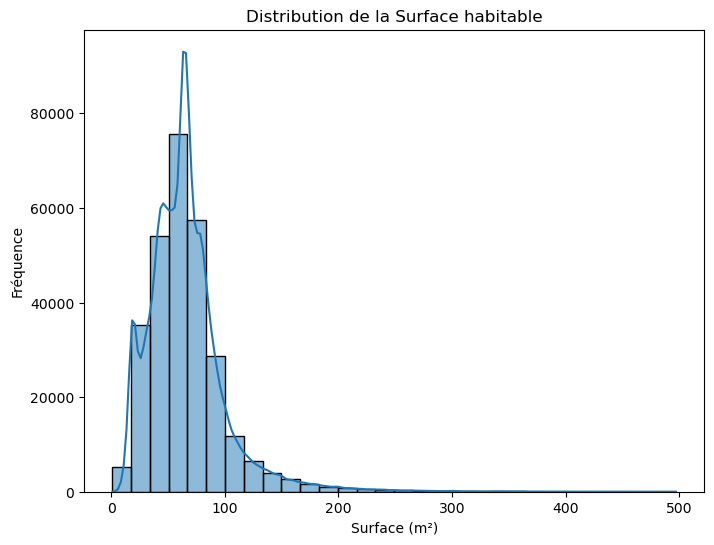

In [240]:
import matplotlib.pyplot as plt 
import seaborn as sns

sub_df = data[data['Surface_habitable_logement']<500]
plt.figure(figsize=(8, 6))
sns.histplot(sub_df['Surface_habitable_logement'], bins=30, kde=True)
plt.title('Distribution de la Surface habitable')
plt.xlabel('Surface (m²)')
plt.ylabel('Fréquence')
plt.show()

## Echantillonnage

In [241]:
X = data[quant_cols]
Y = data['Etiquette_DPE']

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)

In [243]:
#from sklearn.impute import SimpleImputer

# Imputation des NaN par la moyenne des colonnes
#imputer = SimpleImputer(strategy='mean')
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

## Arbre de décision

In [244]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

model_arbre = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=50, min_samples_split=100)
model_arbre = model_arbre.fit(X_train,y_train)

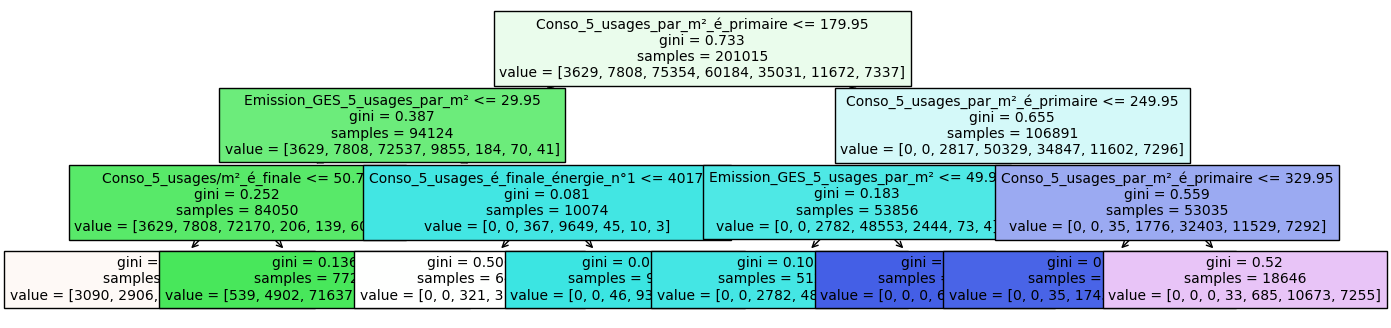

In [245]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,4))
plot_tree(model_arbre,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

In [246]:
y_pred_ad = model_arbre.predict(X_test)
y_pred_ad

array(['E', 'D', 'C', ..., 'D', 'E', 'D'], dtype=object)

In [247]:
y_pred_proba = model_arbre.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.00000000e+00, 0.00000000e+00, 1.01776731e-03, 5.06848120e-02,
        9.22329815e-01, 2.48916805e-02, 1.07592544e-03],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [6.97888208e-03, 6.34702782e-02, 9.27543926e-01, 7.38026491e-04,
        7.25078658e-04, 2.84852330e-04, 2.58956664e-04],
       [0.00000000e+00, 0.00000000e+00, 1.01776731e-03, 5.06848120e-02,
        9.22329815e-01, 2.48916805e-02, 1.07592544e-03],
       [6.97888208e-03, 6.34702782e-02, 9.27543926e-01, 7.38026491e-04,
        7.25078658e-04, 2.84852330e-04, 2.58956664e-04],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1

In [248]:
from sklearn.metrics import classification_report, confusion_matrix

In [249]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_ad))
print("Rapport de classification :\n", classification_report(y_test, y_pred_ad))

Matrice de confusion :
 [[ 1299     0   257     0     0     0     0]
 [ 1258     0  2088     0     0     0     0]
 [  238     0 30845  1199    12     1     0]
 [   58     0   188 24790   734    23     0]
 [   39     0    19    28 14615   313     0]
 [   15     0     6     1   413  4567     0]
 [   11     0    11     2    14  3106     0]]


c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rapport de classification :
               precision    recall  f1-score   support

           A       0.45      0.83      0.58      1556
           B       0.00      0.00      0.00      3346
           C       0.92      0.96      0.94     32295
           D       0.95      0.96      0.96     25793
           E       0.93      0.97      0.95     15014
           F       0.57      0.91      0.70      5002
           G       0.00      0.00      0.00      3144

    accuracy                           0.88     86150
   macro avg       0.55      0.66      0.59     86150
weighted avg       0.83      0.88      0.86     86150



c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [250]:
from sklearn.metrics import classification_report, confusion_matrix

In [251]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [252]:
y_pred_knn = model_knn.predict(X_test)

In [253]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))

Matrice de confusion :
 [[ 1369   137    40     4     5     1     0]
 [  150  2316   838    34     8     0     0]
 [   38   398 28906  2804   128    14     7]
 [    5    17  2552 20458  2545   185    31]
 [    4     6   322  3638  9997   898   149]
 [    0     1    62   540  1911  2064   424]
 [    0     4    37   139   440   717  1807]]
Rapport de classification :
               precision    recall  f1-score   support

           A       0.87      0.88      0.88      1556
           B       0.80      0.69      0.74      3346
           C       0.88      0.90      0.89     32295
           D       0.74      0.79      0.77     25793
           E       0.66      0.67      0.67     15014
           F       0.53      0.41      0.46      5002
           G       0.75      0.57      0.65      3144

    accuracy                           0.78     86150
   macro avg       0.75      0.70      0.72     86150
weighted avg       0.77      0.78      0.77     86150



## Aller plus loin avec SMOTE pour ré équilibrer les classes

In [254]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE and apply it to your training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [255]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

## Random forest

In [256]:
from sklearn.metrics import classification_report, confusion_matrix

In [257]:
 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=0, verbose=1)

rf_model = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [258]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))

Matrice de confusion :
 [[ 1537    19     0     0     0     0     0]
 [    1  3312    33     0     0     0     0]
 [    1     5 32085   199     4     1     0]
 [    0     0   163 25449   178     3     0]
 [    0     0    10   180 14707   110     7]
 [    0     0     2     9    99  4848    44]
 [    0     0     0     2    14    53  3075]]
Rapport de classification :
               precision    recall  f1-score   support

           A       1.00      0.99      0.99      1556
           B       0.99      0.99      0.99      3346
           C       0.99      0.99      0.99     32295
           D       0.98      0.99      0.99     25793
           E       0.98      0.98      0.98     15014
           F       0.97      0.97      0.97      5002
           G       0.98      0.98      0.98      3144

    accuracy                           0.99     86150
   macro avg       0.99      0.98      0.98     86150
weighted avg       0.99      0.99      0.99     86150



In [259]:

importances_df = pd.DataFrame(rf_model.feature_importances_,
                              index=data[ls_variables_explicatives].columns,
                              columns=['Importances']).sort_values(by='Importances', ascending=False)

print(importances_df)

                                     Importances
Conso_5_usages_par_m²_é_primaire        0.342778
Emission_GES_5_usages_par_m²            0.173590
Conso_5_usages/m²_é_finale              0.151086
Conso_chauffage_é_primaire              0.033010
Coût_chauffage                          0.023678
Emission_GES_chauffage                  0.022994
Surface_habitable_logement              0.020961
Besoin_ECS                              0.020863
Coût_total_5_usages                     0.018849
Conso_éclairage_é_finale                0.018576
Type_énergie_principale_chauffage       0.018192
Conso_ECS_é_primaire                    0.018093
Année_construction                      0.016858
Conso_ECS_dépensier_é_finale            0.016356
Conso_5_usages_é_finale_énergie_n°1     0.016308
Conso_chauffage_é_finale                0.016189
Conso_auxiliaires_é_finale              0.009114
Besoin_chauffage                        0.007358
Déperditions_murs                       0.006191
Deperditions_envelop

## KNN over sampling

In [260]:
knn_smote = KNeighborsClassifier(n_neighbors=3)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)

In [261]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn_smote))
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn_smote))

Matrice de confusion :
 [[ 1384   145    17     7     1     1     1]
 [  182  2753   358    40    10     3     0]
 [   52  1158 27638  3065   309    53    20]
 [    8    65  1959 19534  3616   500   111]
 [    2    15   196  2490 10131  1837   343]
 [    0     1    27   280  1234  2734   726]
 [    0     4    12    65   257   743  2063]]
Rapport de classification :
               precision    recall  f1-score   support

           A       0.85      0.89      0.87      1556
           B       0.66      0.82      0.74      3346
           C       0.91      0.86      0.88     32295
           D       0.77      0.76      0.76     25793
           E       0.65      0.67      0.66     15014
           F       0.47      0.55      0.50      5002
           G       0.63      0.66      0.64      3144

    accuracy                           0.77     86150
   macro avg       0.71      0.74      0.72     86150
weighted avg       0.78      0.77      0.77     86150



In [262]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

## Regression logistique

In [263]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)


c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [264]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_reg))
print("Rapport de classification :\n", classification_report(y_test, y_pred_reg))

Matrice de confusion :
 [[   93     0  1330   132     1     0     0]
 [   36     0  2897   389    18     5     1]
 [   17     0 24789  7214   205    59    11]
 [    1     0  5626 18326  1521   250    69]
 [    0     0  1231 10337  3004   351    91]
 [    0     0   267  2984  1400   294    57]
 [    0     0   150  1405  1090   446    53]]


c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rapport de classification :
               precision    recall  f1-score   support

           A       0.63      0.06      0.11      1556
           B       0.00      0.00      0.00      3346
           C       0.68      0.77      0.72     32295
           D       0.45      0.71      0.55     25793
           E       0.41      0.20      0.27     15014
           F       0.21      0.06      0.09      5002
           G       0.19      0.02      0.03      3144

    accuracy                           0.54     86150
   macro avg       0.37      0.26      0.25     86150
weighted avg       0.49      0.54      0.49     86150



c:\Users\karam\anaconda3\envs\M1lyon\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
reg_log_model.predict_proba(X_test)[0:10]

array([[2.74312341e-03, 4.17212419e-02, 2.43756257e-01, 3.48229494e-01,
        2.18685066e-01, 6.90458152e-02, 7.58190025e-02],
       [4.16390004e-04, 1.73686970e-02, 3.62024428e-01, 3.69300273e-01,
        2.02878236e-01, 3.05005003e-02, 1.75114751e-02],
       [2.37180846e-01, 2.12730968e-01, 5.47981080e-01, 2.10710577e-03,
        6.57920907e-10, 4.14805155e-15, 2.41456217e-25],
       [2.83611538e-33, 2.83628269e-12, 3.35465427e-03, 1.11907235e-01,
        5.08304499e-01, 3.14857619e-01, 6.15759924e-02],
       [1.66413135e-03, 3.75342269e-02, 3.70590476e-01, 3.25358309e-01,
        1.75069801e-01, 4.89087914e-02, 4.08742654e-02],
       [1.09681440e-03, 2.78481865e-02, 2.03533240e-01, 3.47956669e-01,
        2.40184011e-01, 9.05341005e-02, 8.88469785e-02],
       [3.27195909e-20, 5.95267365e-03, 1.97732273e-01, 3.58182650e-01,
        3.04016516e-01, 1.32135232e-01, 1.98065502e-03],
       [2.31229028e-04, 1.88171071e-02, 3.16173878e-01, 3.39017087e-01,
        2.08023037e-01, 6

In [266]:
coef = pd.DataFrame(reg_log_model.coef_[0], index=data[ls_variables_explicatives].columns, columns=['Coef']).sort_values(by='Coef', ascending=False)
print(coef)

                                             Coef
Besoin_ECS                           5.243493e-05
Conso_éclairage_é_finale             4.019865e-06
Conso_refroidissement_é_finale       2.741770e-06
Surface_habitable_logement           9.826219e-07
Emission_GES_refroidissement         9.943423e-08
Type_bâtiment                        3.863316e-08
Qualité_isolation_murs              -4.558055e-09
Inertie_lourde_(0/1)                -9.817346e-09
Type_installation_chauffage         -2.248488e-08
Nombre_niveau_logement              -4.413577e-08
Zone_climatique_                    -6.224338e-08
Qualité_isolation_plancher_bas      -6.233515e-08
Periode_construction                -1.118987e-07
Deperditions_planchers_bas          -3.308177e-07
Type_énergie_principale_chauffage   -3.353554e-07
Deperditions_planchers_hauts        -4.082306e-07
Nombre_appartement                  -8.409860e-07
Emission_GES_5_usages_par_m²        -9.500961e-07
Déperditions_ponts_thermiques       -1.460344e-06


## Xgboot

In [267]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Encodage des classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Création et entraînement du modèle
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train_encoded)

# Prédiction sur le jeu de test
y_pred_xgb = xgb_model.predict(X_test)

# Décodage des prédictions
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

In [268]:
#Évaluation du modèle
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb_decoded))
print("Rapport de classification :\n", classification_report(y_test, y_pred_xgb_decoded))

Matrice de confusion :
 [[ 1554     2     0     0     0     0     0]
 [    2  3322    22     0     0     0     0]
 [    2    10 32118   158     7     0     0]
 [    0     0   174 25470   143     6     0]
 [    0     0     6   188 14705   109     6]
 [    0     0     1     7   130  4807    57]
 [    0     0     0     2     3    75  3064]]
Rapport de classification :
               precision    recall  f1-score   support

           A       1.00      1.00      1.00      1556
           B       1.00      0.99      0.99      3346
           C       0.99      0.99      0.99     32295
           D       0.99      0.99      0.99     25793
           E       0.98      0.98      0.98     15014
           F       0.96      0.96      0.96      5002
           G       0.98      0.97      0.98      3144

    accuracy                           0.99     86150
   macro avg       0.99      0.98      0.98     86150
weighted avg       0.99      0.99      0.99     86150

